In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cloudy_fit_lib import *
from scipy.interpolate import RegularGridInterpolator
import pickle
import corner
import emcee

In [3]:
rootdir = '' # Path to grid pickle

In [4]:
savedir = '' # Path to MCMC save directory

Species names

In [5]:
ion_list = ['HI', 'HeI', 'CII', 'CIII', 'CIV', 'NII', 'NIII', 'NIV', 'NV',
            'OII', 'OIII', 'OIV', 'OV', 'OVI', 'SiII', 'SiIII', 'SiIV',
            'MgII', 'MgX', 'NeV', 'NeVI', 'NeVIII', 'SIV', 'SV', 'SVI']

Specify density/metallicity grid

In [6]:
log_metals_arr = [-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,-1.0 ,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0]
log_hdens_arr = [-4.8,-4.4,-4.2,-4.0,-3.8,-3.6,-3.4,-3.2,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6]
logT_arr = np.arange(4.00, 6.01, 0.01)

Load grids

In [7]:
pkl_file = open(rootdir+'TDP_grid.pkl', 'rb')
logX_dict_TDP_samples = pickle.load(pkl_file)
pkl_file.close()

Set up the 3D grid across metallicity, density, and temperature

In [8]:
logX_dict_TDP_interp = {}

for ion in ion_list:
    logX_dict_TDP_interp[ion] = RegularGridInterpolator((log_metals_arr, log_hdens_arr, logT_arr), 
                                                     logX_dict_TDP_samples[ion])

# Make diagnostics

In [9]:
logN_dict = {#'HI':'12.9, -0.2, +0.1',
    #'HeI':'<13.1',
    #'NII':'<13.3',
    #'NIII':'<13.0',
    #'NIV':'<12.7',
    #'CII':'<13.3',
    'CIII':'13.0, -0.2, +0.2',
    'CIV':'12.76, -0.03, +0.03',
    #'OII':'<14.0',
    #'OIII':'<13.3',
    'OIV':'13.41, -0.09, +0.07',}
    #'OV':'<12.7',
    #'OVI':'<13.5',
    #'NeV':'<13.4',
    #'NeVI':'<13.4',
    #'NeVIII':'<13.5',
    #'MgX':'<13.6',
    #'AlII':'<10.9',
    #'AlIII':'<11.4',
    #'SiII':'<14.0',
    #'SiIII':'<11.9',
    #'SiIV':'<12.0',
    #'SIV':'<12.9',
    #'SV':'<12.5',
    #'SVI':'<13.3',
    #'FeII':'<11.5',}

## CIII, CIV, OIV

In [10]:
gen_logN_ratio_str(logN_dict['CIV'], logN_dict['OIV'])

'-0.65, -0.09, 0.08'

In [11]:
logN_ratio_dict = {'CIV/CIII': '-0.24, -0.20, 0.20',
                   'CIV/OIV': '-0.65, -0.09, 0.09',
                  }

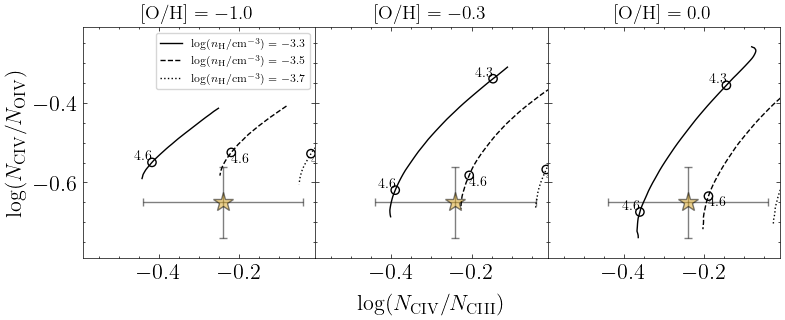

In [12]:
fig, axes = plt.subplots(1,3,figsize=(3*3,3), sharex=True, sharey=True)

# Plot measurements

scat_logN_ratio(axes[0], 'CIV/CIII', 'CIV/OIV', logN_ratio_dict)
axes[0].set_title(r'$\mathrm{[O/H]}=-1.0$', fontsize=14)

scat_logN_ratio(axes[1], 'CIV/CIII', 'CIV/OIV', logN_ratio_dict)
axes[1].set_title(r'$\mathrm{[O/H]}=-0.3$', fontsize=14)

scat_logN_ratio(axes[2], 'CIV/CIII', 'CIV/OIV', logN_ratio_dict)
axes[2].set_title(r'$\mathrm{[O/H]}=0.0$', fontsize=14)

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$\log(N_\mathrm{CIV}/N_\mathrm{CIII})$', labelpad=25)
ax_label.set_ylabel(r'$\log(N_\mathrm{CIV}/N_\mathrm{OIV})$', labelpad=40)

plt.subplots_adjust(wspace=0, hspace=0.0)

# Plot tracks
# metals = -1.0

plot_logN_ratio_track(axes[0], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      -1.0, -3.3, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[0], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      -1.0, -3.5, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[0], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      -1.0, -3.7, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      ':', 'left', 'top')

axes[0].legend(fontsize=8)

# metals = -0.3

plot_logN_ratio_track(axes[1], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      -0.3, -3.3, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[1], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      -0.3, -3.5, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[1], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      -0.3, -3.7, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      ':', 'left', 'top')

# metals = 0.0

plot_logN_ratio_track(axes[2], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      0.0, -3.3, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[2], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      0.0, -3.5, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[2], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      0.0, -3.7, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      ':', 'left', 'top')

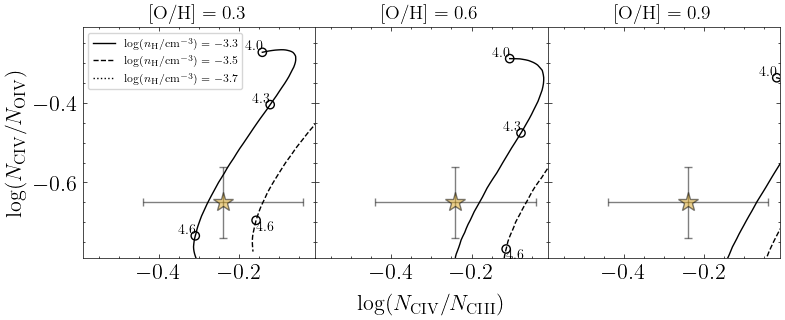

In [13]:
fig, axes = plt.subplots(1,3,figsize=(3*3,3), sharex=True, sharey=True)

# Plot measurements

scat_logN_ratio(axes[0], 'CIV/CIII', 'CIV/OIV', logN_ratio_dict)
axes[0].set_title(r'$\mathrm{[O/H]}=0.3$', fontsize=14)

scat_logN_ratio(axes[1], 'CIV/CIII', 'CIV/OIV', logN_ratio_dict)
axes[1].set_title(r'$\mathrm{[O/H]}=0.6$', fontsize=14)

scat_logN_ratio(axes[2], 'CIV/CIII', 'CIV/OIV', logN_ratio_dict)
axes[2].set_title(r'$\mathrm{[O/H]}=0.9$', fontsize=14)

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$\log(N_\mathrm{CIV}/N_\mathrm{CIII})$', labelpad=25)
ax_label.set_ylabel(r'$\log(N_\mathrm{CIV}/N_\mathrm{OIV})$', labelpad=40)

plt.subplots_adjust(wspace=0, hspace=0.0)

# Plot tracks
# metals = -1.0

plot_logN_ratio_track(axes[0], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      0.3, -3.3, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[0], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      0.3, -3.5, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[0], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      0.3, -3.7, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      ':', 'left', 'top')

axes[0].legend(fontsize=8)

# metals = -0.3

plot_logN_ratio_track(axes[1], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      0.6, -3.3, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[1], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      0.6, -3.5, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[1], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      0.6, -3.7, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      ':', 'left', 'top')

# metals = 0.0

plot_logN_ratio_track(axes[2], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      0.9, -3.3, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[2], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      0.9, -3.5, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      '--', 'right', 'top')

plot_logN_ratio_track(axes[2], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      0.9, -3.7, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      ':', 'left', 'top')

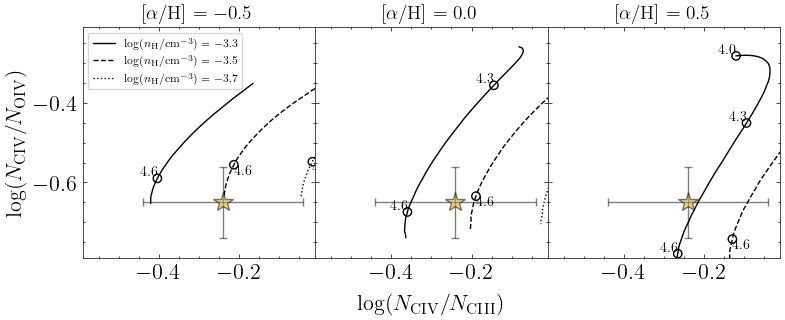

In [17]:
fig, axes = plt.subplots(1,3,figsize=(3*3,3), sharex=True, sharey=True)

# Plot measurements

scat_logN_ratio(axes[0], 'CIV/CIII', 'CIV/OIV', logN_ratio_dict)
axes[0].set_title(r'$\mathrm{[\alpha/H]}=-0.5$', fontsize=14)

scat_logN_ratio(axes[1], 'CIV/CIII', 'CIV/OIV', logN_ratio_dict)
axes[1].set_title(r'$\mathrm{[\alpha/H]}=0.0$', fontsize=14)

scat_logN_ratio(axes[2], 'CIV/CIII', 'CIV/OIV', logN_ratio_dict)
axes[2].set_title(r'$\mathrm{[\alpha/H]}=0.5$', fontsize=14)

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$\log(N_\mathrm{CIV}/N_\mathrm{CIII})$', labelpad=25)
ax_label.set_ylabel(r'$\log(N_\mathrm{CIV}/N_\mathrm{OIV})$', labelpad=40)

plt.subplots_adjust(wspace=0, hspace=0.0)

# Plot tracks
# metals = -0.5

plot_logN_ratio_track(axes[0], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      -0.5, -3.3, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[0], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      -0.5, -3.5, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[0], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      -0.5, -3.7, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      ':', 'left', 'top')

axes[0].legend(fontsize=8)

# metals = 0.0

plot_logN_ratio_track(axes[1], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      0.0, -3.3, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[1], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      0.0, -3.5, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[1], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      0.0, -3.7, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      ':', 'left', 'top')

# metals = 0.5

plot_logN_ratio_track(axes[2], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      0.5, -3.3, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[2], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      0.5, -3.5, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[2], 'CIII', 'CIV', 'OIV', 'CIV', logX_dict_TDP_interp,
                      0.5, -3.7, 
                      4.0, 4.7, .01,
                      4.0, 4.7, .3,
                      -0.59,-0.01, -0.79,-0.21,
                      ':', 'left', 'top')

plt.savefig(savedir+'diagnostic_example.pdf', dpi=300)
plt.savefig(savedir+'diagnostic_example.png', dpi=300)

# Fit column densities

In [18]:
def log_prior(log_metals, log_hdens, logT, C_O, N_O):
    
    if log_metals_arr[0]<log_metals<log_metals_arr[-1] and -3<log_metals+C_O<1 and -3<log_metals+N_O<1: #[C/H]
        if log_hdens_arr[0]<log_hdens<log_hdens_arr[-1]:
            if 4.<logT<4.6: # Temperature limit based on CIV linewidth
                return 0.
            else:
                return -np.inf
        else:
            return -np.inf
    else:
        return -np.inf

In [19]:
def log_likelihood(log_metals, log_hdens, logT, C_O, N_O, logN_dict, logX_dict_TDP_interp):
    
    logN_HI_obs = 12.9 # Measured N(HI) to generate column densities
    
    ll = 0
    
    for ion in list(logN_dict.keys()):
        
        # Model side: prediction adjusted for elemental abundance
        elem = ion_species_dict[ion].split('+')[0]
        
        y_bar = predict_col_dens_TDP(ion, log_metals, log_hdens, logT, logN_HI_obs, logX_dict_TDP_interp)
        if elem == 'C':
            y_bar += C_O 
        if elem == 'N':
            y_bar += N_O
            
        # Data side: handle upper limits, lower limits, and measurements separately
        logN_str = logN_dict[ion]
        
        ll += compute_ll(logN_str, y_bar)

    return ll

In [20]:
def log_probability(params, logN_dict, logX_dict_TDP_interp):
    
    log_metals, log_hdens, logT, C_O, N_O = params
    
    lp = log_prior(log_metals,log_hdens,logT,C_O,N_O)
    
    if not np.isfinite(lp):
        return -np.inf
    return lp+log_likelihood(log_metals,log_hdens,logT,C_O,N_O,logN_dict,logX_dict_TDP_interp)

In [21]:
logN_dict = {#'HI':'12.9, -0.2, +0.1',
    'HeI':'<13.1',
    'NII':'<13.3',
    'NIII':'<13.0',
    'NIV':'<12.7',
    'CII':'<13.3',
    'CIII':'13.0, -0.2, +0.2',
    'CIV':'12.76, -0.03, +0.03',
    'OII':'<14.0',
    'OIII':'<13.3',
    'OIV':'13.41, -0.09, +0.07',
    'OV':'<12.7',
    #'OVI':'<13.5',
    #'NeV':'<13.4',
    #'NeVI':'<13.4',
    #'NeVIII':'<13.5',
    #'MgX':'<13.6',
    #'AlII':'<10.9',
    #'AlIII':'<11.4',
    'SiII':'<14.0',
    'SiIII':'<11.9',
    'SiIV':'<12.0',
    'SIV':'<12.9',
    'SV':'<12.5',
    'SVI':'<13.3',}
    #'FeII':'<11.5',}

In [22]:
log_metals_test = 0.5
log_hdens_test = -3.1
logT_test = 4.3
logN_HI_test = 12.9
C_O_test = 0.2
N_O_test = -1.0

logN_test = predict_col_dens_model_TDP(logN_dict,log_metals_test,log_hdens_test,logT_test,logN_HI_test,logX_dict_TDP_interp, C_O_test, N_O_test)

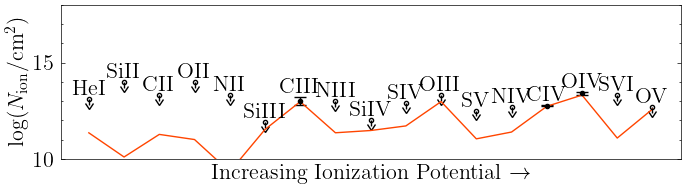

In [23]:
fig, ax = plt.subplots(1, figsize=(8,2))

plot_column_densities_obs(logN_dict, fig, ax)

ax.plot(np.arange(len(logN_dict)), logN_test, color='orangered')

In [24]:
pos = np.array([log_metals_test, log_hdens_test, logT_test, C_O_test, N_O_test]) + 1e-4 * np.random.randn(200, 5)
nwalkers, ndim = pos.shape

In [25]:
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(logN_dict, logX_dict_TDP_interp)
)

In [26]:
sampler.run_mcmc(pos, 500, progress=True);

100%|█████████████████████████████████████████| 500/500 [04:30<00:00,  1.85it/s]


In [27]:
flat_samples = pd.DataFrame(sampler.get_chain(discard=100, flat=True), 
                                columns=['log_metals', 'log_hdens', 'logT', 'C_O', 'N_O'])
flat_samples.to_csv(savedir+'TDP.csv', index=False)

#flat_samples = pd.read_csv(savedir+'TDP.csv')

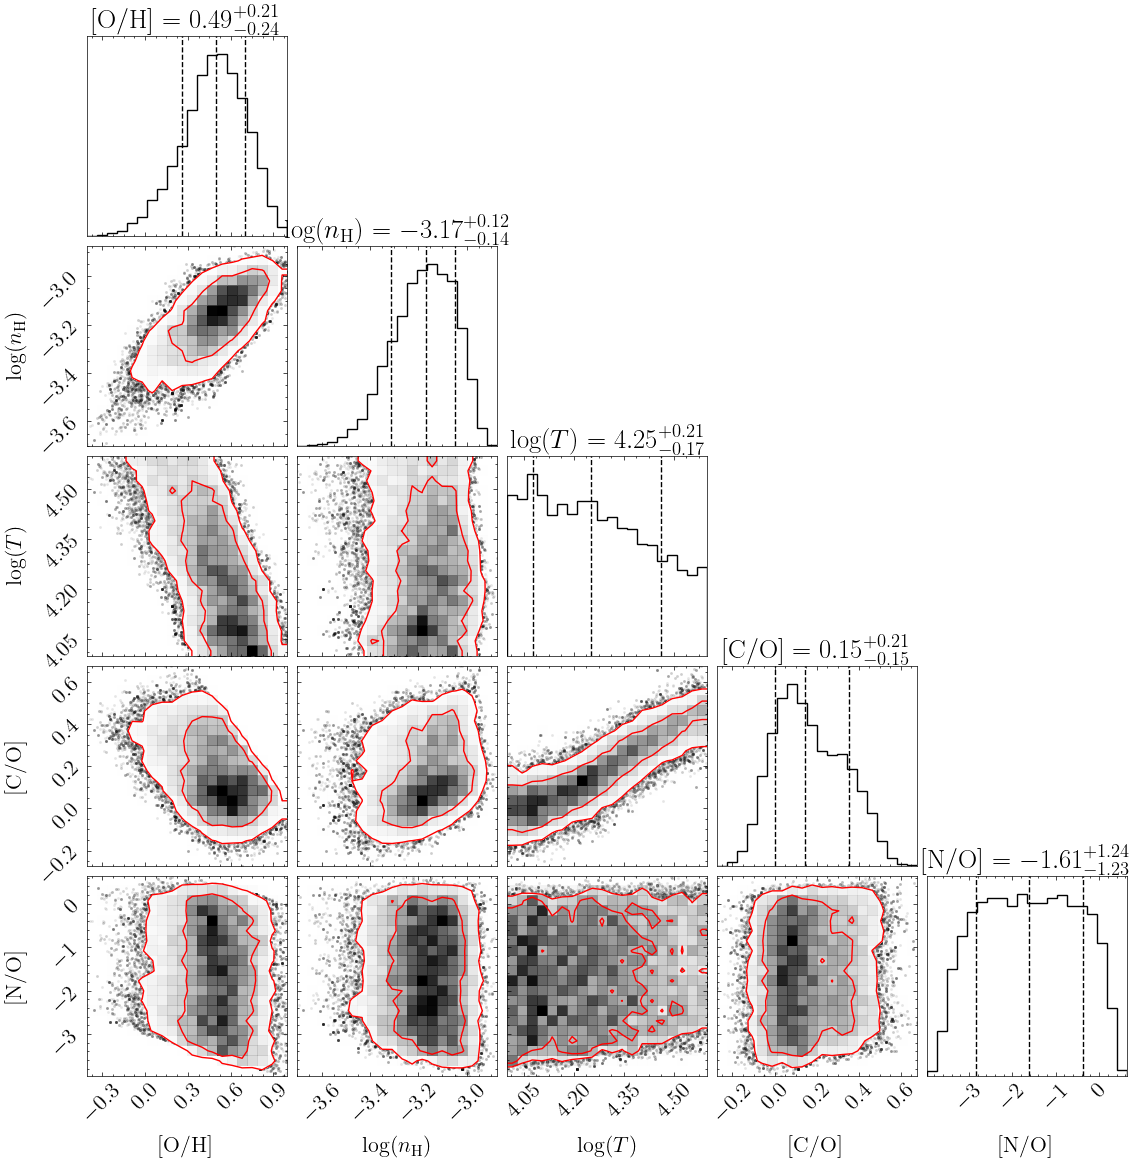

In [28]:
fig = corner.corner(
    flat_samples, quantiles = [0.16, 0.5, 0.84], show_titles=True, 
    labels=[r'$\mathrm{[O/H]}$', r'$\log(n_\mathrm{H})$', r'$\log(T)$', r'$\mathrm{[C/O]}$',r'$\mathrm{[N/O]}$'], 
    plot_density=True, levels=[0.68, 0.95], contour_kwargs={'colors':'red'}
);

In [41]:
np.median(flat_samples['C_O'])

0.1456532247270687

In [29]:
np.percentile(flat_samples['logT'], 100*(1-cdf_3sig)), np.percentile(flat_samples['logT'], 100*cdf_3sig)

(4.000845944489305, 4.599085185125179)

(array([7829., 9134., 8682., 8349., 8908., 8861., 8975., 8633., 7349.,
        3280.]),
 array([-2.99923074, -2.59948355, -2.19973636, -1.79998917, -1.40024198,
        -1.00049479, -0.6007476 , -0.20100041,  0.19874678,  0.59849397,
         0.99824116]),
 <BarContainer object of 10 artists>)

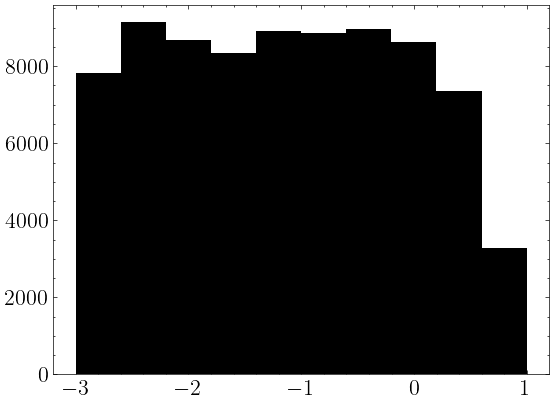

In [30]:
plt.hist(flat_samples['log_metals']+flat_samples['N_O'])

In [31]:
np.percentile(flat_samples['N_O'], 100*cdf_3sig)

0.44640307160978865

Make a plot

In [32]:
logN_dict = {#'HI':'12.9, -0.2, +0.1',
    #'HeI':'<13.1',
    #'NII':'<13.3',
    #'NIII':'<13.0',
    #'NIV':'<12.7',
    #'CII':'<13.3',
    'CIII':'13.0, -0.2, +0.2',
    'CIV':'12.76, -0.03, +0.03',
    #'OII':'<14.0',
    'OIII':'<13.3',
    'OIV':'13.41, -0.09, +0.07',
    'OV':'<12.7',
    #'OVI':'<13.5',
    #'NeV':'<13.4',
    #'NeVI':'<13.4',
    #'NeVIII':'<13.5',
    #'MgX':'<13.6',
    #'AlII':'<10.9',
    #'AlIII':'<11.4',
    #'SiII':'<14.0',
    'SiIII':'<11.9',
    'SiIV':'<12.0',}
    #'SIV':'<12.9',
    #'SV':'<12.5',
    #'SVI':'<13.3',}
    #'FeII':'<11.5',}

In [33]:
b_dict = {'HI':'22, -2, +2',
          'CIII':'6.6, -0.6, +0.6',
          'CIV':'6.6, -0.6, +0.6',
          'OIV':'6.6, -0.6, +0.6'}

In [34]:
p_grid = np.array(flat_samples)

yb_med = np.zeros(len(logN_dict))
yb_lo = np.zeros(len(logN_dict))
yb_hi = np.zeros(len(logN_dict))

ctr = 0

for i in range(len(ion_species_dict)):
    
    ion = list(ion_species_dict.keys())[i]
    elem = ion_species_dict[ion].split('+')[0]
    
    if ion in list(logN_dict.keys()):
        
        y_samples = predict_col_dens_TDP(ion, p_grid[:,0], p_grid[:,1], p_grid[:,2], 12.9, logX_dict_TDP_interp)
        if elem == 'C':
            y_samples += p_grid[:,3]
        if elem == 'N':
            y_samples += p_grid[:,4]

        yb_med[ctr] = np.median(y_samples)
        yb_lo[ctr] = np.percentile(y_samples, 16)
        yb_hi[ctr] = np.percentile(y_samples, 84)
        
        ctr += 1

In [35]:
logN_res_dict = get_logN_residuals(logN_dict, yb_med, yb_lo, yb_hi)

In [36]:
import matplotlib.lines as mlines

In [37]:
z_sys = 1.25937492

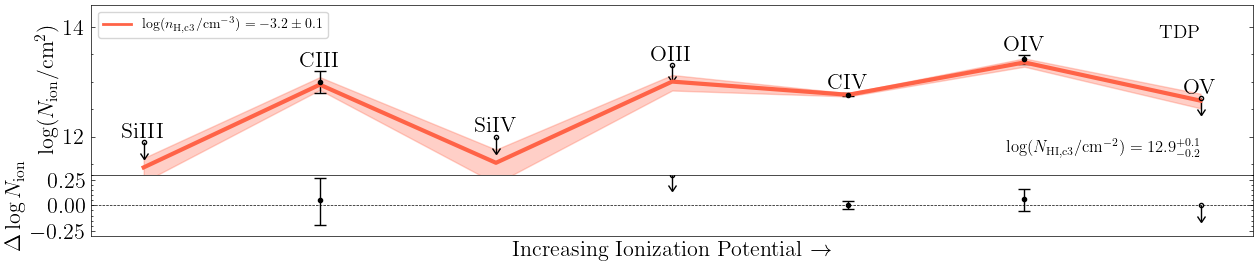

In [38]:
fig, axes = plt.subplots(2, 1, figsize=(15,3.), gridspec_kw={'height_ratios': [2.8, 1]})

plot_column_densities_obs(logN_dict, fig, axes[0],
                   gray_out = ['OVI','NeV', 'NeVI', 'MgII'])

axes[0].plot(np.arange(len(logN_dict)), yb_med, lw=3, color='tomato')
axes[0].fill_between(np.arange(len(logN_dict)), yb_lo, yb_hi, color='tomato', alpha=.3)

axes[0].set_ylim(11.3,14.4)

axes[0].text(len(logN_dict)-1, 13.8, r'TDP', fontsize=14,horizontalalignment='right')

axes[0].text(len(logN_dict)-1, 11.7, r'$\log(N_\mathrm{HI, c3}/\mathrm{cm}^{-2}) = 12.9_{-0.2}^{+0.1}$', fontsize=12,
            horizontalalignment='right')

handles = []

handles.append(mlines.Line2D([], [], lw=2,
                             color='tomato', 
                             marker='None',
              linestyle='-', markersize=8, label=r'$\log(n_\mathrm{H,c3}/\mathrm{cm}^{-3}) = -3.2 \pm 0.1$'))

axes[0].legend(handles=handles, loc='upper left', fontsize=10)

plot_column_densities_obs(logN_res_dict, fig, axes[1], gray_out = ['OVI','NeV', 'NeVI', 'MgII'], label_ions=False, dy=.1)
axes[1].set_ylim(-.3,.3)
axes[1].axhline(0, linestyle='--', lw=.5)
axes[1].set_ylabel(r'$\Delta \log N_\mathrm{ion}$')

plt.subplots_adjust(wspace=0.12, hspace=0) 

#plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_TDP.pdf'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)
#plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_TDP.png'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)

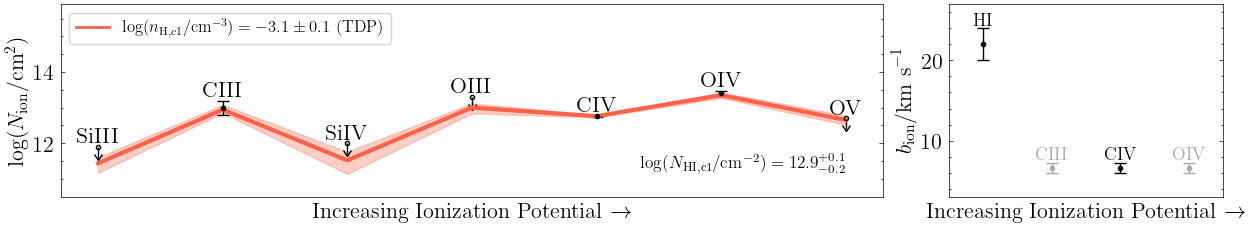

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15,2.5), gridspec_kw={'width_ratios': [3, 1]})

plot_column_densities_obs(logN_dict, fig, axes[0],
                   gray_out = ['OVI','NeV', 'NeVI', 'MgII'])

axes[0].plot(np.arange(len(logN_dict)), yb_med, lw=3, color='tomato')
axes[0].fill_between(np.arange(len(logN_dict)), yb_lo, yb_hi, color='tomato', alpha=.3)

axes[0].set_ylim(10.5,15.9)


axes[0].text(len(logN_dict)-1, 11.3, r'$\log(N_\mathrm{HI, c1}/\mathrm{cm}^{-2}) = 12.9_{-0.2}^{+0.1}$', fontsize=12.5,
            horizontalalignment='right')

handles = []

handles.append(mlines.Line2D([], [], lw=2,
                             color='tomato', 
                             marker='None',
              linestyle='-', markersize=8, label=r'$\log(n_\mathrm{H,c1}/\mathrm{cm}^{-3}) = -3.1 \pm 0.1$ (TDP)'))

axes[0].legend(handles=handles, loc='upper left', fontsize=12)

plot_linewidth_obs(b_dict, fig, axes[1], fs=13, gray_out = ['CIII', 'OIV', 'OVI'])
axes[1].set_xlim(-0.5,len(b_dict)-1+.5)
axes[1].set_ylim(3,27)

plt.subplots_adjust(wspace=0.12, hspace=0)  

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_TDP.pdf'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)
plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_TDP.png'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)

Cloud size posterior

In [34]:
logl = get_logl_TDP(p_grid[:,0], p_grid[:,1], p_grid[:,2], 12.9, logX_dict_TDP_interp)

(array([6.4230e+03, 2.6545e+04, 3.0240e+04, 1.4014e+04, 2.6270e+03,
        1.4600e+02, 4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-2.4856775 , -2.17797519, -1.87027289, -1.56257058, -1.25486827,
        -0.94716597, -0.63946366, -0.33176136, -0.02405905,  0.28364326,
         0.59134556]),
 <BarContainer object of 10 artists>)

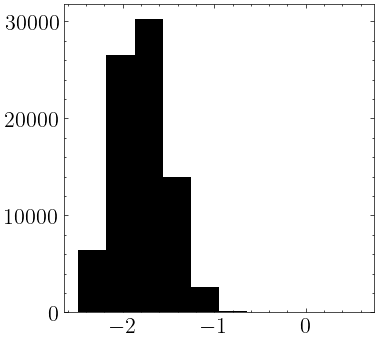

In [35]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.hist(logl)

In [36]:
get_quantiles(logl)

-1.81 -0.28 0.31


## HI

Text(0, 0.5, '$\\log(N_\\mathrm{HI}/\\mathrm{cm}^{-2})$')

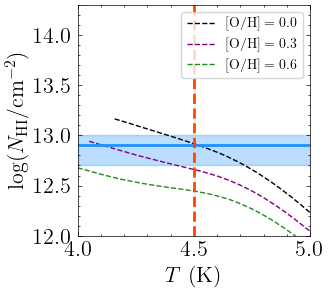

In [14]:
fig, ax = plt.subplots(1, figsize=(3,3))

logT_filt, logN_HI_filt = get_logN_HI('OIV', 13.41, 0, -3.5, logT_arr, logX_dict_TDP_interp)
ax.plot(logT_filt, logN_HI_filt,color='black', linestyle='--', label=r'$\mathrm{[O/H]}=0.0$')

logT_filt, logN_HI_filt = get_logN_HI('OIV', 13.41, 0.3, -3.5, logT_arr, logX_dict_TDP_interp)
ax.plot(logT_filt, logN_HI_filt,color='purple', linestyle='--', label=r'$\mathrm{[O/H]}=0.3$')

logT_filt, logN_HI_filt = get_logN_HI('OIV', 13.41, 0.6, -3.5, logT_arr, logX_dict_TDP_interp)
ax.plot(logT_filt, logN_HI_filt,color='forestgreen', linestyle='--', label=r'$\mathrm{[O/H]}=0.6$')

ax.axhline(12.9, color='dodgerblue', lw=2)
ax.axhspan(12.7,13.0, color='dodgerblue',alpha=.3)
ax.axvline(4.5, color='orangered', lw=2, linestyle='--')

ax.set_xlim(4.0, 5.0)
ax.set_ylim(12, 14.3)

ax.legend(fontsize=10, loc='upper right')
ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\log(N_\mathrm{HI}/\mathrm{cm}^{-2})$')